In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympics/olympics_dataset 2.csv


In [2]:

df = pd.read_csv("/kaggle/input/olympics/olympics_dataset 2.csv")

# Step 1: Check for missing values
print("Initial missing values:")
print(df.isnull().sum())

# Step 3: Check data types and handle string/float inconsistencies
print("\nData types before conversion:")
print(df.dtypes)

# Ensure 'Year' is an integer, 'Sex' is categorical, and other appropriate types
df['Year'] = df['Year'].astype(int)

# Step 4: Remove unwanted columns
# Dropping columns that aren't useful for modeling (e.g., 'player_id', 'Name')
df.drop(columns=['player_id', 'Name'], inplace=True, errors='ignore')

# Step 5: Handle Unwanted/Invalid Values
# Let's check for unique values in categorical columns to spot unwanted values.

# Checking for invalid values in 'Sex' column
print("\nUnique values in 'Sex':", df['Sex'].unique())

# We expect only 'M' and 'F' for 'Sex', so remove or fix invalid entries if found.
df = df[df['Sex'].isin(['M', 'F'])]



# Step 9: Inspect the cleaned data
print("\nCleaned Data (first few rows):")
print(df.head())



Initial missing values:
player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

Data types before conversion:
player_id     int64
Name         object
Sex          object
Team         object
NOC          object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
dtype: object

Unique values in 'Sex': ['M' 'F']

Cleaned Data (first few rows):
  Sex            Team  NOC  Year  Season         City       Sport  \
0   M           China  CHN  1992  Summer    Barcelona  Basketball   
1   M           China  CHN  2012  Summer       London        Judo   
2   M         Denmark  DEN  1920  Summer    Antwerpen    Football   
3   M  Denmark/Sweden  DEN  1900  Summer        Paris  Tug-Of-War   
4   F     Netherlands  NED  1932  Summer  Los Angeles   Athletics   

                          Event     Medal  
0   Bas

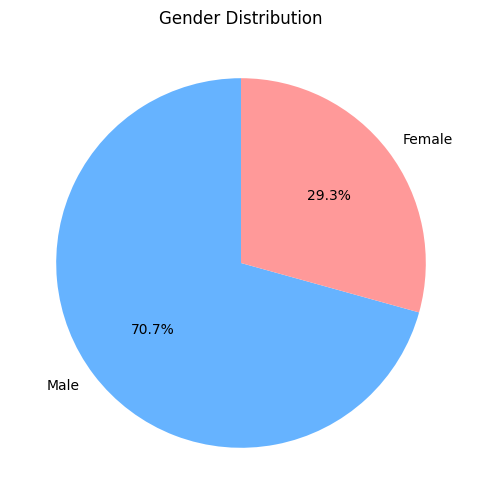

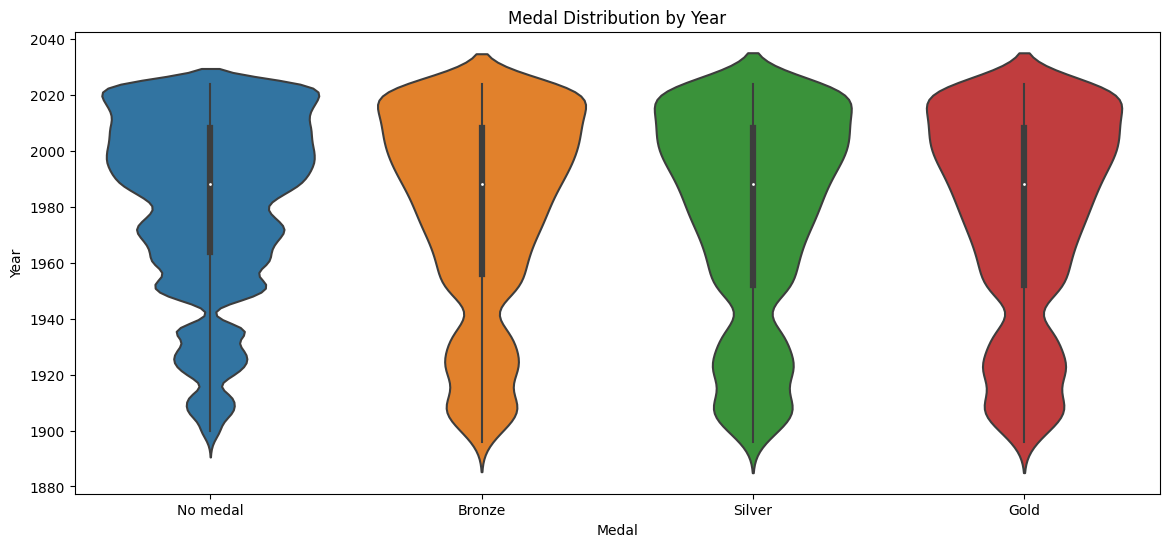

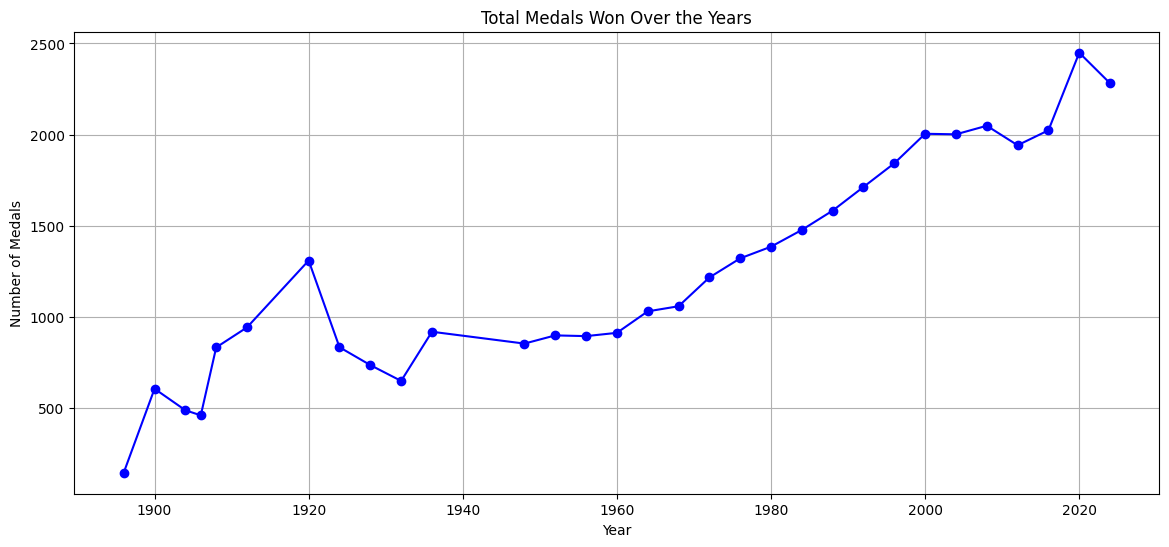

In [3]:

# Step 1: Pie Chart for Gender Distribution
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Gender Distribution')
plt.show()

# Step 2: Violin Plot - Medal distribution over the years
plt.figure(figsize=(14, 6))
sns.violinplot(x='Medal', y='Year', data=df, order=['No medal', 'Bronze', 'Silver', 'Gold'])
plt.title('Medal Distribution by Year')
plt.show()

# Step 3: Line Chart - Medal trend over the years
medals_over_time = df[df['Medal'] != 'No medal'].groupby('Year')['Medal'].count()
plt.figure(figsize=(14, 6))
plt.plot(medals_over_time.index, medals_over_time.values, marker='o', linestyle='-', color='b')
plt.title('Total Medals Won Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()




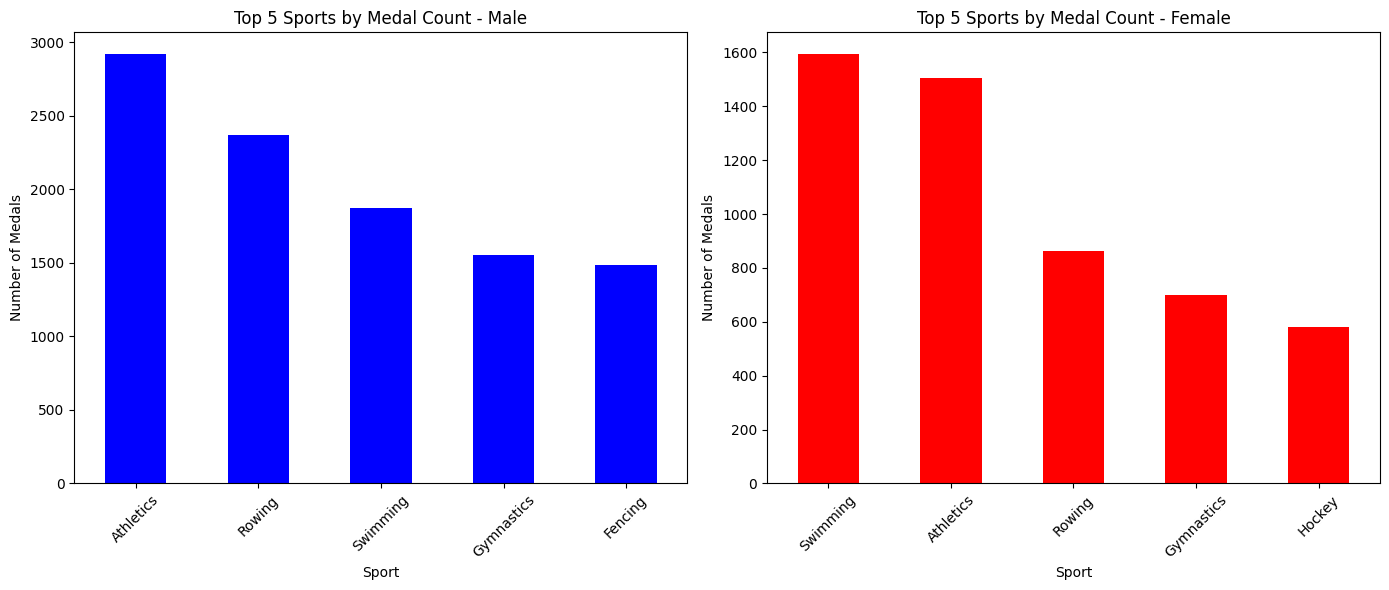

In [4]:



# Step 1: Get the top 5 sports by medal count for each gender
medal_counts_by_gender_sport = df[df['Medal'] != 'No medal'].groupby(['Sport', 'Sex'])['Medal'].count().unstack().fillna(0)

# Sort each gender's sport by the top 5 medal counts
top_sports_male = medal_counts_by_gender_sport['M'].sort_values(ascending=False).head(5)
top_sports_female = medal_counts_by_gender_sport['F'].sort_values(ascending=False).head(5)

# Step 2: Plot top sports for each gender
plt.figure(figsize=(14, 6))

# Plot for males
plt.subplot(1, 2, 1)
top_sports_male.plot(kind='bar', color='b')
plt.title('Top 5 Sports by Medal Count - Male')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

# Plot for females
plt.subplot(1, 2, 2)
top_sports_female.plot(kind='bar', color='r')
plt.title('Top 5 Sports by Medal Count - Female')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


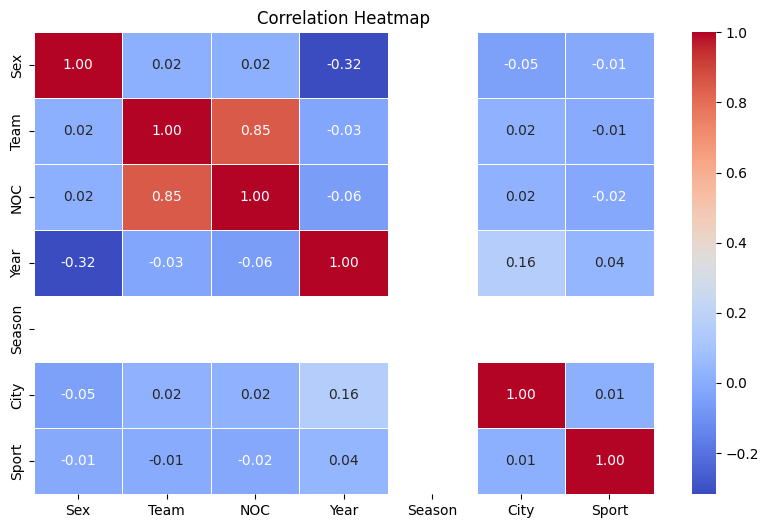

In [5]:

# Convert string categories into numeric codes using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Sex', 'Team', 'NOC', 'Season', 'Sport', 'City']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 4: Heatmap - Correlation between numeric variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode all categorical features
categorical_columns = ['Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event']
label_encoders = {}

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 2: Binary classification - Predict if an athlete wins a medal (Medal vs No medal)
df['Won_Medal'] = np.where(df['Medal'] == 'No medal', 0, 1)

# Define features (X) and target (y)
X = df.drop(columns=['Medal', 'Won_Medal'])  # Features: everything except 'Medal' and 'Won_Medal'
y_binary = df['Won_Medal']  # Target for binary classification

# Split the data into train and test sets for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Step 3: Define the classifiers - Random Forest and KNN
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 4: Function to train and evaluate models
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results[name] = {'Accuracy': accuracy, 'Classification Report': report}
        print(f"{name} - Accuracy: {accuracy}")
        print(f"Classification Report for {name}:\n{report}\n")
    return results

# Step 5: Evaluate Random Forest and KNN for Binary Classification
print("### Binary Classification (Medal or No Medal) ###\n")
binary_results = evaluate_classifiers(X_train_binary, X_test_binary, y_train_binary, y_test_binary, classifiers)


### Binary Classification (Medal or No Medal) ###

Random Forest - Accuracy: 0.9258017685099643
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     64146
           1       0.79      0.70      0.74     11624

    accuracy                           0.93     75770
   macro avg       0.87      0.83      0.85     75770
weighted avg       0.92      0.93      0.92     75770


K-Nearest Neighbors - Accuracy: 0.9086709779596146
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     64146
           1       0.74      0.62      0.68     11624

    accuracy                           0.91     75770
   macro avg       0.84      0.79      0.81     75770
weighted avg       0.90      0.91      0.91     75770




Random Forest often outperforms KNN in many real-world cases due to its ability to handle complex decision boundaries and categorical data better.